# Setup

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from os import path 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from imblearn.over_sampling import SMOTE
import seaborn as sns 
from IPython.core.pylabtools import figsize
from sklearn.ensemble import IsolationForest

figsize(12, 8)


# Load dataset
filename = 'training_dataset.csv'
if not path.isfile(f'./{filename}'):
    !wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df = pd.read_csv(f'{filename}', encoding='utf8')

# Clean data
df.drop(columns = ["id"], inplace=True)

# Split train and test
X = df.drop(columns = ['categoria'])
y = df.categoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

# Impute values
si = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=-1,
    verbose=0,
    copy=True
)

si.fit(X_train)

X_train_imputed = pd.DataFrame.from_records(
    data=si.transform(
        X=X_train
    ),
    columns=X_train.columns
)

X_test_imputed = pd.DataFrame.from_records(
    data=si.transform(
        X=X_test
    ),
    columns=X_test.columns
)

# Change value types
X_train_imputed = X_train_imputed.astype({
    "pretende_fazer_cursos_lit": "int32",
    "interesse_mba_lit": "int32",
    "importante_ter_certificado": "int32",
    "horas_semanais_estudo": "int32",
    "total_modulos": "int32",
    "modulos_iniciados": "int32",
    "modulos_finalizados": "int32",
    "certificados": "int32"
})

X_test_imputed = X_test_imputed.astype({
    "pretende_fazer_cursos_lit": "int32",
    "interesse_mba_lit": "int32",
    "importante_ter_certificado": "int32",
    "horas_semanais_estudo": "int32",
    "total_modulos": "int32",
    "modulos_iniciados": "int32",
    "modulos_finalizados": "int32",
    "certificados": "int32"
})

# Get dummies
features = ["graduacao", "universidade", "profissao", "organizacao", "pretende_fazer_cursos_lit", "interesse_mba_lit", "importante_ter_certificado", "como_conheceu_lit"]

X_train_enc = pd.get_dummies(X_train_imputed, columns = features, sparse=True, drop_first=False)
X_test_enc = pd.get_dummies(X_test_imputed, columns = features, sparse=True, drop_first=False)

# Encode target
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Detect outliers
# iso = IsolationForest(contamination=0.1)
# yhat = iso.fit_predict(X_train_enc)

# mask = yhat != -1
# mask = pd.Series(mask, name='bools')

# X_par = X_train_enc[mask.values]
# y_par = y_train_enc[mask.values]

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

k_vs_score = [] 
initial_features = 4
max_n_features = X_train_enc.shape[1]
step = 2

# Feature selection
for k in range(initial_features, max_n_features, step):
  selector = SelectKBest(score_func=f_classif, k=k)

  Xtrain2 = selector.fit_transform(X_train_enc, y_train_enc)
  Xval2 = selector.transform(X_test_enc)

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=133)
  model.fit(Xtrain2, y_train_enc)

  p = model.predict(Xval2)

  score = mean_absolute_error(y_test_enc, p)
  print("k = {} - MAE = {}".format(k, score))

  mask = selector.get_support()
  #print(X_par.columns[mask])

  k_vs_score.append(score)

k = 4 - MAE = 0.5420344682639765
k = 6 - MAE = 0.5260613703236654
k = 8 - MAE = 0.5218579234972678
k = 10 - MAE = 0.5193358554014291
k = 12 - MAE = 0.5109289617486339
k = 14 - MAE = 0.5063051702395964
k = 16 - MAE = 0.49810844892812106
k = 18 - MAE = 0.5033627574611181
k = 20 - MAE = 0.492854140395124
k = 22 - MAE = 0.4915931063472047
k = 24 - MAE = 0.492854140395124
k = 26 - MAE = 0.485708280790248
k = 28 - MAE = 0.48360655737704916
k = 30 - MAE = 0.47940311055065155
k = 32 - MAE = 0.47793190416141235
k = 34 - MAE = 0.4833963850357293
k = 36 - MAE = 0.4791929382093317
k = 38 - MAE = 0.47456914670029426
k = 40 - MAE = 0.4751996637242539
k = 42 - MAE = 0.47540983606557374
k = 44 - MAE = 0.47793190416141235
k = 46 - MAE = 0.4777217318200925
k = 48 - MAE = 0.4766708701134931
k = 50 - MAE = 0.474989491382934
k = 52 - MAE = 0.4796132828919714
k = 54 - MAE = 0.4833963850357293
k = 56 - MAE = 0.4760403530895334
k = 58 - MAE = 0.4798234552332913
k = 60 - MAE = 0.48360655737704916
k = 62 - MAE 

In [5]:
features = ['horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados', 'graduacao_Bacharelado',
       'graduacao_Especialização', 'graduacao_Licenciatura', 'graduacao_MBA',
       'graduacao_SEM FORMAÇÃO', 'graduacao_Tecnólogo',
       'universidade_CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ',
       'universidade_Escola Paulista de Direito',
       'universidade_FACULDADE ANHANGUERA', 'universidade_FATEC',
       'universidade_FGV-RJ',
       'universidade_INSPER INSTITUTO DE ENSINO E PESQUISA',
       'universidade_UEPB', 'universidade_UFF', 'universidade_UFPE',
       'universidade_UFRJ', 'universidade_UFRN', 'universidade_UFSCar',
       'universidade_UNICAMP', 'universidade_UNIP',
       'universidade_UNIVERSIDADE CRUZEIRO DO SUL',
       'universidade_UNIVERSIDADE ESTADUAL DE PONTA GROSSA',
       'universidade_UNIVERSIDADE NOVE DE JULHO',
       'universidade_UNIVERSIDADE PRESBITERIANA MACKENZIE', 'universidade_USP',
       'universidade_Unesp',
       'universidade_Universidade Metodista de Sao Paulo',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário', 'organizacao_Borracha',
       'organizacao_Eletrodomesticos', 'organizacao_Eletroeletronicos',
       'organizacao_Entretenimento', 'organizacao_Estado',
       'organizacao_Laminados', 'organizacao_Montadora',
       'organizacao_Oleo e Gas', 'organizacao_Siderurgica',
       'organizacao_e-commerce', 'organizacao_servicos',
       'pretende_fazer_cursos_lit_0', 'pretende_fazer_cursos_lit_1',
       'interesse_mba_lit_0', 'interesse_mba_lit_1',
       'importante_ter_certificado_1', 'como_conheceu_lit_Facebook',
       'como_conheceu_lit_Google', 'como_conheceu_lit_Instagram',
       'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Saint Paul',
       'como_conheceu_lit_YouTube']

X_train_enc = X_train_enc[features]
X_test_enc = X_test_enc[features]

In [6]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=133, n_jobs=-1, k_neighbors=10)
X_res, y_res = sm.fit_resample(X_train_enc, y_train_enc)

# Training/Testing

In [7]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso, LogisticRegression

# Model stacking
estimators = [
    ('rf', RandomForestClassifier(random_state=133, n_jobs=-1)),
    ('xgb', XGBClassifier(n_jobs=-1, random_state=133))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test_enc)

In [8]:
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score, plot_precision_recall_curve

print(f'Model accuracy: {accuracy_score(y_test_enc, y_pred) * 100:.2f}%')
print(classification_report(y_test_enc, y_pred))

Model accuracy: 81.11%
              precision    recall  f1-score   support

           0       0.83      0.72      0.78       758
           1       0.81      0.85      0.83      1282
           2       0.81      0.77      0.79       316
           3       0.77      0.79      0.78       487
           4       0.79      0.78      0.78       587
           5       0.83      0.85      0.84      1328

    accuracy                           0.81      4758
   macro avg       0.81      0.79      0.80      4758
weighted avg       0.81      0.81      0.81      4758



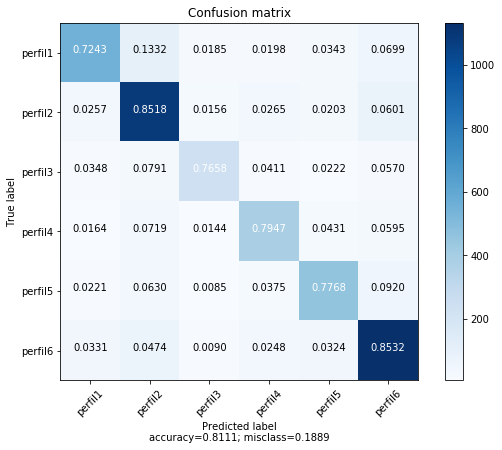

In [9]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


plot_confusion_matrix(confusion_matrix(y_test_enc, y_pred), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

# Validation

In [10]:
# Load dataset
filename = 'to_be_scored.csv'
if not path.isfile(f'./{filename}'):
    !wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(f'{filename}', encoding='utf8')

In [12]:
# Mirror tranformations
df_to_be_scored.drop(columns=["id"], inplace=True)

df_to_be_scored = pd.DataFrame.from_records(
    data=si.transform(
        X=df_to_be_scored
    ),
    columns=df_to_be_scored.columns
)

features = ["graduacao", "universidade", "profissao", "organizacao", "pretende_fazer_cursos_lit", "interesse_mba_lit", "importante_ter_certificado", "como_conheceu_lit"]

tidy_scored = pd.get_dummies(df_to_be_scored, columns = features, sparse=True, drop_first=False)

In [13]:
# Prediction
y_pred = clf.predict(tidy_scored)
tidy_scored['target'] = y_pred
tidy_scored['target'] = le.inverse_transform(tidy_scored['target'])

In [14]:
# Write prediction to csv
tidy_scored.to_csv("./results.csv", index=False)

# Submission

<p style="text-align:center">
        <b>Victor Wildner, veja seu desempenho no desafio 6!</b>
    <br/>
    <br/>
        <b>Status da submissão: Avaliado</b>
    <br/>
    Qualidade alcançada:
    <br/>
    <br/>
    <b>★ ★ ★ ★ ★</b>
    <br/>
    <br/>
    Parabéns pela sua submissão! Lembrando que você pode submeter até três vezes cada<br/>
    desafio, então é possível melhorar sua pontuação. Ao final, apenas a sua submissão com <br/>
    a maior pontuação será considerada!
</p>